### **norm.pdf()**

##### **Ejemplo 1**

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años.

In [10]:
datos = datos[(datos.age > 15) & (datos.male == 0)]
peso = datos['weight']
peso

1      36.485807
2      31.864838
4      41.276872
6      38.243476
8      34.869885
         ...    
529    39.405805
533    40.823280
534    47.031821
537    34.246196
541    54.062497
Name: weight, Length: 198, dtype: float64

In [11]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso)

print(mu)
print(sigma)

41.38615752272728
5.737813252284781


In [36]:
# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

**FORMA 1**

Histograma con datos reales y funcion de densidad normalizada

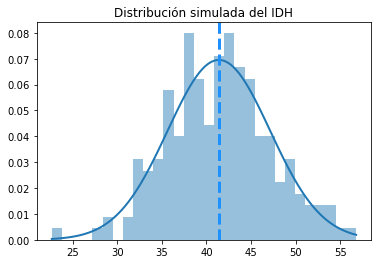

In [37]:
# Gráfico
plt.plot(x_hat, y_hat, linewidth=2, label='normal')
plt.hist(peso, density=True, bins=30, color="#3182bd", alpha=0.5)

plt.axvline(mu, color='dodgerblue', linestyle='--', lw=3) 
plt.title("Distribución simulada del IDH") 
plt.subplots_adjust(hspace=0.6)

**FORMA 2**

- Histograma con datos reales y funcion de densidad real
- Histograma con datos normalizados y funcion de densidad normalizada

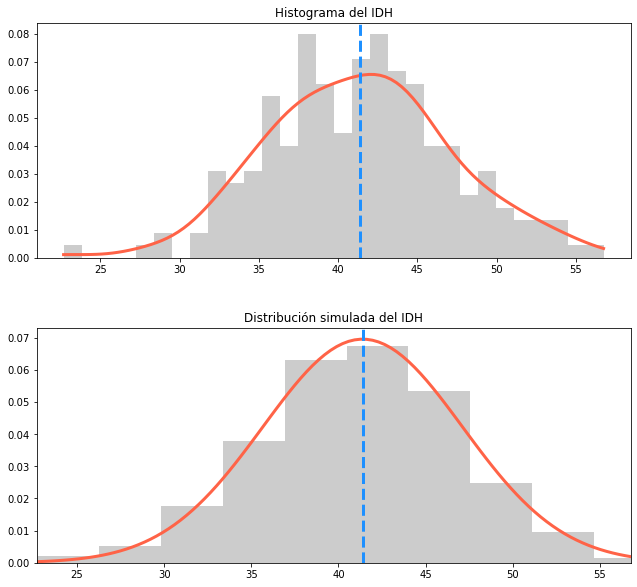

In [54]:
###################################################################
# Datos reales

# Generamos el primer espacio para el primer histograma
plt.subplot(2,1,1)

plt.hist(peso, bins= 30, color='grey', alpha=.4, density=True) 

gauss_kde = stats.gaussian_kde(peso) # Kernel gaussiano 
z = np.reshape(gauss_kde(x_hat), x_hat.shape) 

plt.plot(x_hat, z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media 
plt.axvline(peso.mean(), color='dodgerblue', linestyle='--', lw=3) 
plt.title("Histograma del IDH")
plt.subplots_adjust(hspace=0.6, top=2, right=1.5)

###################################################################
# Datos normalizados

# El segundo gráfico 
plt.subplot(2, 1, 2)

# Simulamos cómo debería comportarse un histograma normal
datos_normal = np.random.normal(mu, sigma, 1000)

plt.hist(datos_normal, color='grey', alpha=.4, density=True)

# Fijamos los límites del eje x 
plt.xlim(min(peso), max(peso))

# Generamos una lista entre:
x_axis = np.linspace(min(peso), max(peso), 1000)
y_axis = stats.norm.pdf(x_axis, mu, sigma)

plt.plot(x_hat, y_hat, color='tomato', lw=3)
plt.axvline(mu, color='dodgerblue', linestyle='--', lw=3) 
plt.title("Distribución simulada del IDH") 
plt.subplots_adjust(hspace=0.3)